<a href="https://colab.research.google.com/github/JeraldSanInterno/CPE-031-Visualization-and-Data-Analysis/blob/main/Hands_on_Activity_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ComputerData.xlsx')

In [ ]:
print(df)

   Computer ID   Brand        Model    Processor  RAM (GB)  Storage (GB)  \
0            1    Dell       XPS 13     Intel i7        16           512   
1            2      HP  Pavilion 15  AMD Ryzen 5         8           256   
2            3   Apple  MacBook Pro     Apple M1        16          1024   
3            4  Lenovo  ThinkPad X1     Intel i9        32           512   
4            5    Asus   ZenBook 14     Intel i5        16           512   

      Graphics Card  Price ($)  
0     Intel Iris Xe       1200  
1        AMD Radeon        800  
2  Apple Integrated       2400  
3   NVIDIA GTX 1650       1800  
4      NVIDIA MX250       1000  


In [ ]:
#trim variables that has storage of 512GB
df[df['Storage (GB)'] == 512]

,Computer ID,Brand,Model,Processor,RAM (GB),Storage (GB),Graphics Card,Price ($)
0,1,Dell,XPS 13,Intel i7,16,512,Intel Iris Xe,1200
3,4,Lenovo,ThinkPad X1,Intel i9,32,512,NVIDIA GTX 1650,1800
4,5,Asus,ZenBook 14,Intel i5,16,512,NVIDIA MX250,1000


In [ ]:
#import sample data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SampleData.xlsx')

In [ ]:
print(df)

    OrderDate   Region       Rep     Item  Units  Unit Cost    Total
0  2021-01-06     East     Jones   Pencil     95       1.99   189.05
1  2021-01-23  Central    Kivell   Binder     50      19.99   999.50
2  2021-02-09  Central   Jardine   Pencil     36       4.99   179.64
3  2021-02-26  Central      Gill      Pen     27      19.99   539.73
4  2021-03-15     West   Sorvino   Pencil     56       2.99   167.44
5  2021-04-01     East     Jones   Binder     60       4.99   299.40
6  2021-04-18  Central   Andrews   Pencil     75       1.99   149.25
7  2021-05-05  Central   Jardine   Pencil     90       4.99   449.10
8  2021-05-22     West  Thompson   Pencil     32       1.99    63.68
9  2021-06-08     East     Jones   Binder     60       8.99   539.40
10 2021-06-25  Central    Morgan   Pencil     90       4.99   449.10
11 2021-07-12     East    Howard   Binder     29       1.99    57.71
12 2021-07-29     East    Parent   Binder     81      19.99  1619.19
13 2021-08-15     East     Jones  

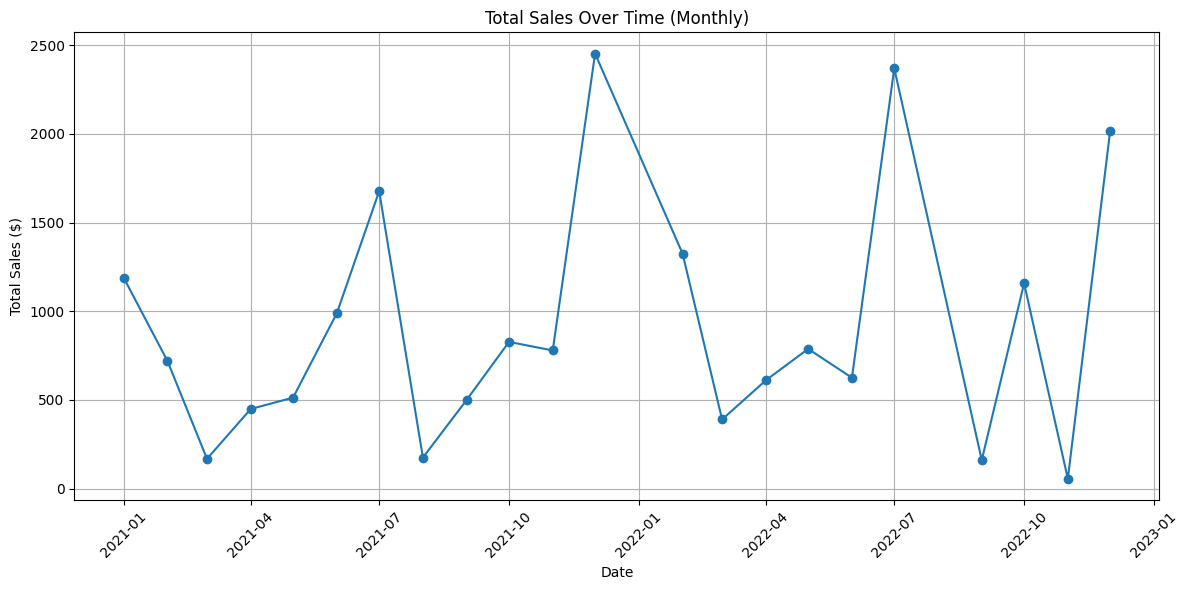

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
14,2021-09-01,Central,Smith,Desk,2,125.00,250.00
15,2021-09-01,Central,Smith,Desk,2,125.00,250.00
21,2021-12-29,East,Parent,Pen Set,74,15.99,1183.26
22,2021-12-29,East,Parent,Pen Set,74,15.99,1183.26
33,2022-07-21,Central,Morgan,Pen Set,55,12.49,686.95
34,2022-07-21,Central,Morgan,Pen Set,55,12.49,686.95
35,2022-07-21,Central,Morgan,Pen Set,55,12.49,686.95


In [17]:
#interpret your data, appropriate title, appropriate chart
#display the dataframe of these items with same data of sell, per region, according to it's representative
import matplotlib.pyplot as plt

# Ensure 'OrderDate' is in datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Group by month and sum the 'Total' sales
monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M'))['Total'].sum()

# Convert the PeriodIndex to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Group by Region, Rep, Item, and Total to identify duplicate sales entries
duplicate_sales = df.groupby(['Region', 'Rep', 'Item', 'Total']).filter(lambda x: len(x) > 1)

# Display the filtered dataframe
display(duplicate_sales)

#DESCRIPTIVE ANALYSIS
---
The "Total Sales Over Time (Monthly)" chart illustrates the monthly sales performance, revealing notable peaks in December 2021 and July 2022, with sales fluctuating throughout the observed period without a clear consistent trend. The duplicate sales data table identifies instances where sales transactions have identical details across Region, Representative, Item, and Total, specifically highlighting repeated entries for 'Desk' by 'Smith' in the Central region, 'Pen Set' by 'Parent' in the East region, and 'Pen Set' by 'Morgan' in the Central region, which may require further examination for data accuracy.

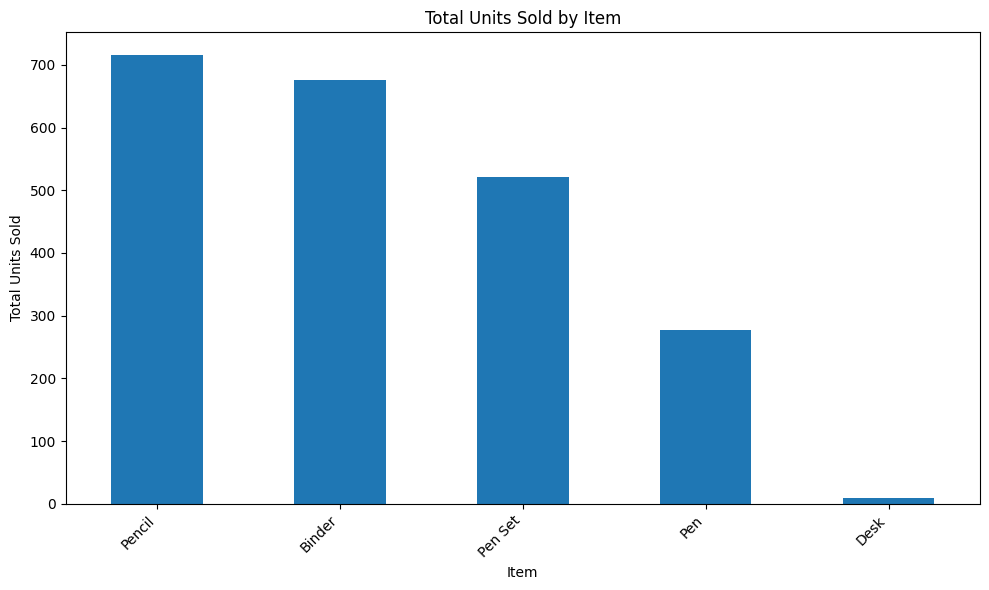

,Units
Item,
Pencil,716
Binder,676
Pen Set,521
Pen,278
Desk,9


In [19]:
# Group by 'Item' and sum the 'Units' sold
units_by_item = df.groupby('Item')['Units'].sum().sort_values(ascending=False)

# Create a bar chart of units sold by item
plt.figure(figsize=(10, 6))
units_by_item.plot(kind='bar')
plt.title('Total Units Sold by Item')
plt.xlabel('Item')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the dataframe of units sold by item
display(units_by_item)

#DATA ANALYSIS
---
The "Total Units Sold By Item" chart and table indicate that "Pencil" and the "Binder" are the most sold items by unit, followed by "Pen Set","Pen", while "Desk" has the lowest number of units sold.